# Purpose

The purpose of this notebook is to show how to use rpy2 in a Python based jupyter notebook.

**Setup**

You might have to uninstall certain packages and reinstall as different version

`conda create -n eda jupyter pandas numpy seaborn matplotlib`

`conda activate eda`

`pip install rpy2`

`conda install -c conda-forge r r-essentials r-ggplot2 r-lazyeval r-dplyr r-tidyr r-magrittr`

`jupyter notebook`

Links: 

- https://rpy2.github.io/doc/latest/html/notebooks.html
- https://rpy2.github.io/doc/latest/html/interactive.html?highlight=magic#rpy2.ipython.rmagic.RMagics


In [9]:
# Load python packages
import seaborn as sns

In [10]:
# Load rpy2 extension (and R packages)
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [11]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)
library(magrittr)

# Import data

In [12]:
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Visualize data

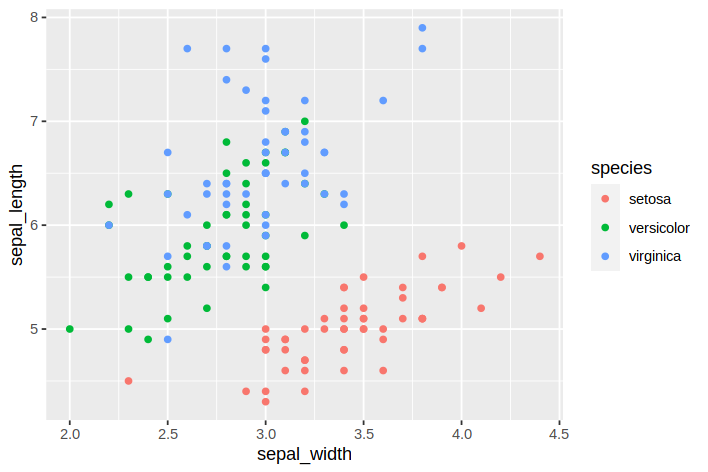

In [76]:
%%R -w 15 -h 10 --units cm -r 120 -i df
ggplot(df, aes(x = sepal_width, y = sepal_length, color = species, 
               color = species)) +
    geom_point()